In [1]:
# modules
require('rstan')
require('qqman')
require('loo')

DATA.DIR <- '/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data'
CODE.DIR <- '/scratch/PI/mrivas/users/erflynn/sex_div_gwas/mixture_model_scripts/'

source(sprintf("%s/project_utils.R", CODE.DIR))
source(sprintf("%s/project_utils_add.R", CODE.DIR))


Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.15.1, packaged: 2017-04-19 05:03:57 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).

Loading required package: loo
This is loo version 1.1.0
Loading required package: MASS
Loading required package: Matrix
Loading required package: mnormt


In [2]:
trait <- 'RH107'

In [3]:
load(sprintf('%s/f_m1_%s.RData', DATA.DIR, trait)) # --> fit1, dat


In [ ]:
# load results
load(sprintf('%s/f_m2.a_%s.RData', DATA.DIR, trait)) # --> fit2.a
fit2.a <- fit2
load(sprintf('%s/f_m2.a_%s.RData', DATA.DIR, trait)) # --> fit2

Inference for Stan model: model1_loglik.
4 chains, each with iter=300; warmup=200; thin=1; 
post-warmup draws per chain=100, total post-warmup draws=400.

                   mean se_mean      sd         2.5%          50%        97.5%
Sigma[1,1]      0.00500 0.00002 0.00028      0.00450      0.00498      0.00557
Sigma[1,2]      0.00499 0.00002 0.00029      0.00446      0.00498      0.00562
Sigma[2,1]      0.00499 0.00002 0.00029      0.00446      0.00498      0.00562
Sigma[2,2]      0.00512 0.00002 0.00035      0.00446      0.00509      0.00585
pi[1]           0.98473 0.00006 0.00098      0.98290      0.98477      0.98664
pi[2]           0.01527 0.00006 0.00098      0.01336      0.01523      0.01710
lp__       713942.68011 0.11850 1.52943 713938.73582 713943.08828 713944.51155
           n_eff    Rhat
Sigma[1,1]   253 1.00928
Sigma[1,2]   252 1.01205
Sigma[2,1]   252 1.01205
Sigma[2,2]   256 1.01418
pi[1]        246 1.01576
pi[2]        246 1.01576
lp__         167 0.99833

Samples were

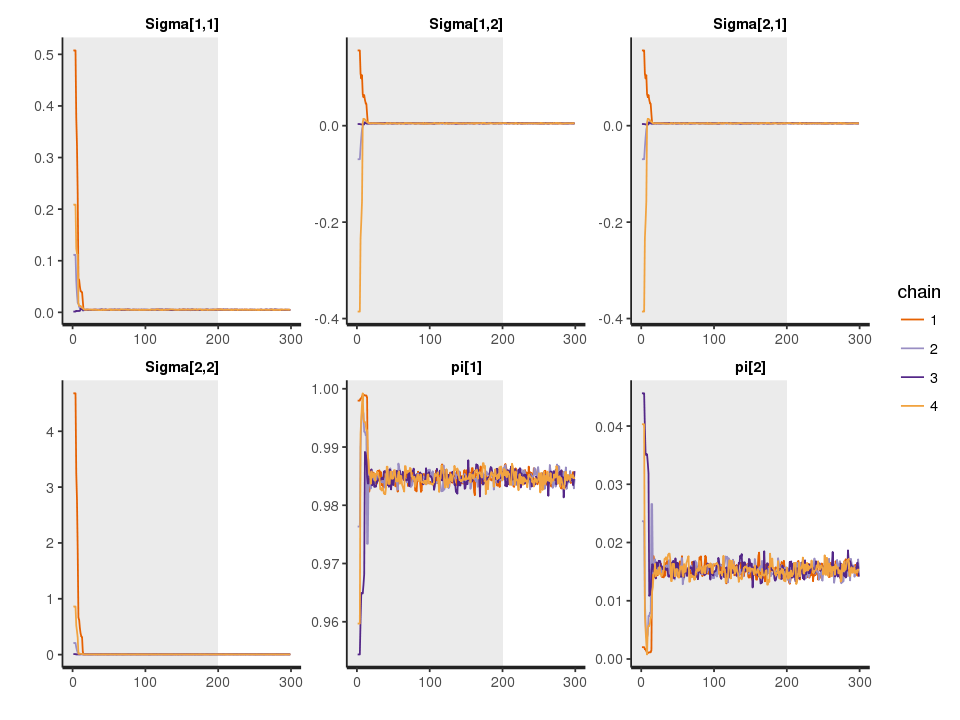

In [5]:
print(fit1, pars=c("Sigma", "pi", "lp__"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit1, pars = c("Sigma", "pi"), inc_warmup = TRUE, nrow = 2)

In [6]:
# genetic correlation
getSigma(fit1)
getRg(getSigma(fit1))
getPi(fit1)

[1] 0.986405

0.004998941,0.004988723
0.004988723,0.005116703


[1] 0.98472644 0.01527356

In [7]:
lrt(dat$dat, fit1)

[1] -3834054

In [9]:
B_dat <- dat$dat$B
SE_dat <- dat$dat$SE
l.n <- sum(sapply(1:dat$dat$N, function(i) computeNullLikelihood(B_dat[i,], SE_dat[i,])))

In [10]:
l.n

[1] -665803.5

In [ ]:
l.m <- sum(sapply(1:dat$dat$N, function(i) computeLikelihood(B_dat[i,], SE_dat[i,], getPi(fit1), getSigma(fit1))))

In [ ]:
print(fit2, pars=c("sigmasq", "pi", "lp__"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit2, pars = c("sigmasq", "pi"), inc_warmup = TRUE, nrow = 2)


In [ ]:
print(fit2.a, pars=c("sigmasq", "pi", "lp__"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit2.a, pars = c("sigmasq", "pi"), inc_warmup = TRUE, nrow = 2)


In [ ]:
# process
#  - look at convergence
#  - extract parameter estimates
#      - m1 - pi, Sigma, Rg, LRT
#      - m2 - pi, sigmasq, loo

log_lik1 <- extract_log_lik(fit2)
loo_1 <- loo(log_lik1)
print(loo_1)
log_lik2 <- extract_log_lik(fit2.a)
loo_2 <- loo(log_lik2)
print(loo_2)

# comparing 2 vs 4 model on data generated from 4 components
diff <- compare(loo_1, loo_2)
print(diff)


In [ ]:
# identify sex-specific SNPs
